In [1]:
# global var set
import transformers

# model info, change as needed
batch_size = 16
num_epochs = 16

model_checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
# model_checkpoint = 'bert-base-uncased'
# fileTag = "original-plutchik-noCombin-v1"   # original - no Combine    - pure raw
# fileTag = "original-plutchik-v1"             # original - w/ Combine
# fileTag = "clean-noCombin-v1"                # clean    - no Combine
fileTag = "clean-v1"                         # clean    - w/ Combine    - pure clean

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [62]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [63]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//2], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//2:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//2], trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//2:]]), 
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//2 else 1 for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'], 
                                  'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//2], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//2:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//2], testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//2:]]), 
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//2 else 1 for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [64]:
trainDatasetProcessed.to_csv(f'./dataset/2Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,label
0,['happy'],"{'joy': 2, 'trust': 2, 'fear': 2, 'surprise': ...",James was asked to fill in.,June was always top of her class.,0
1,['exhausted'],"{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",Ali had really enjoyed the vineyard tour!,"That evening, Sam's mom got a call from her we...",1
2,"['sad', 'down']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I wanted to be thin like the friends i associa...,Michelle didn't make the cheerleading squad.,1
3,['frustration'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","While playing, Sammy accidentally broke a vase!",He was diagnosed with laryngitis.,1
4,['anticipation'],"{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",They only had 5 days.,He eats it between classes at school.,0
...,...,...,...,...,...
42949,"['happy', 'proud']","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",They all asked for the recipe but Dina refused.,"He also built little people, and little pets.",0
42950,['afraid'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",He stopped at Wendy's.,"While in the crypt, Marissa asked constantly t...",1
42951,"['relieved', 'grateful']","{'joy': 2, 'trust': 0, 'fear': 2, 'surprise': ...",I replaced the roll of toilet paper.,One day she told her dad about the bullying.,0
42952,['calm'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She would receive fresh vegetables and fruit f...,My piano instructor came over for my lessons.,0


In [65]:
testDatasetProcessed.to_csv(f'./dataset/2Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,label
0,['satisfied'],"{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",He made sure to leave them perfect.,Sam went into his backyard to dig a hole for a...,0
1,['nervous'],"{'joy': 2, 'trust': 2, 'fear': 3, 'surprise': ...",She joined a relief organization and helped re...,Tim needed to take a large test to graduate fr...,1
2,['scary'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",An old man came out of the house yelling causi...,They were in my mom's garden when I was a kid.,0
3,['relieved'],"{'joy': 2, 'trust': 3, 'fear': 0, 'surprise': ...",She took it to obedience class to learn to beh...,The photos ended up looking great.,0
4,['disgusted'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","Searching through these dresses, one stood out...",It was far too sour and Suzy never wanted coff...,1
...,...,...,...,...,...
43190,['angry'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",She had become the bad guy of the office very ...,The teacher heard the phone ring.,0
43191,['irritated'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",One day he overheard others talking in spanish.,I wish people in the theatre weren't so rude.,1
43192,['helpful'],"{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",She asked the waiter for recommendations.,He then told everyone how cool and manly Theo ...,0
43193,['proud'],"{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...","Alison stood on the podium, beaming as she rec...","When we were walking together, I noticed that ...",0


# load dataset

In [2]:
from datasets import load_dataset, load_metric

In [3]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/2Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/2Select-{fileTag}-test.csv'})

Using custom data configuration default-4feaf5ecff007f10
Reusing dataset csv (C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-4feaf5ecff007f10\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'label'],
        num_rows: 11129
    })
})

In [5]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['apprehensive', 'sad', 'desperate', 'annoyed', 'pressure', 'hopeful', 'trust', 'useless']",
 'plutchik': "{'joy': 0, 'trust': 0, 'fear': 1, 'surprise': 1, 'sadness': 1, 'disgust': 1, 'anger': 1, 'anticipation': 1}",
 'selection0': 'Her mom suggested she call her dad and ask for some.',
 'selection1': 'Sean knew that the noises were from a mountain lion.',
 'label': 0}

In [6]:
def show_one(example):
    print(f"Context: {example['plutchik']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"\nGround truth: option {['A', 'B'][example['label']]}")

In [7]:
show_one(dataset["train"][0])

Context: {'joy': 0, 'trust': 0, 'fear': 3, 'surprise': 1, 'sadness': 1, 'disgust': 1, 'anger': 1, 'anticipation': 1}
  A - He showed this by approaching girls in bars every night.
  B - Security threatened to arrest Ed.

Ground truth: option B


# Preprocessing Data

In [8]:
if model_checkpoint != 'distilbert-base-uncased-finetuned-sst-2-english':
    from transformers import AutoTokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
else:
    from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
    tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-cased")

In [9]:
import re
import ast
selectionList = ["selection0", "selection1"]
weightRemap = ["NOT ", "LITTLE ", "", "VERY ", "ABSOLUTELY "]
def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*2 for context in examples["emotion"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '')) ]*2 for context in examples["plutchik"] ]
    # first_sentences = [["The following sentences contain emotions: {}".format(", ".join([weightRemap[int(eachCaseWeight.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", ""))] 
    #                                                                   + eachCaseEmotionType.replace("]", "").replace("[", "").replace("}", "").replace("{", "").replace("\"", "").replace("\'", "").strip()
    #                     for eachCaseWeight, eachCaseEmotionType in 
    #                     zip([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]][eventIndex], 
    #                        [re.split(':|,',eachEmotionCombination)[::2] for eachEmotionCombination in examples["plutchik"]][eventIndex])]))]*2 for eventIndex in 
    #                        range(len([re.split(':|,',eachEmotionCombination)[1::2] for eachEmotionCombination in examples["plutchik"]]))]
    
    first_sentences = [["The following sentences contain emotions: {}".format(', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
                       for eachEmotion in ast.literal_eval(context).items()]))]*2 
                       for context in examples["plutchik"]]
    # first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\"', '') 
    #                   if context in {"[]", "[\"none\"]"} 
    #                   else ', '.join([(weightRemap[eachEmotion[1]] + " " +eachEmotion[0]).strip() 
    #                                   for eachEmotion in ast.literal_eval(context.replace(":", "\" : ").replace("\",", ",").replace("[", "{").replace("\"]", "}").replace("]", "}")).items()]))]*2 
    #                    for context in examples["plutchik"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList]for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+2] for i in range(0, len(v), 2)] for k, v in tokenized_examples.items()}

In [10]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 2 [62, 57]


In [11]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(1) ]

['[CLS] The following sentences contain emotions : NOT joy, NOT trust, VERY fear, LITTLE surprise, LITTLE sadness, LITTLE disgust, LITTLE anger, LITTLE anticipation [SEP] He showed this by approaching girls in bars every night. [SEP]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, VERY sadness, disgust, anger, NOT anticipation [SEP] Gordo loses his job. [SEP]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, fear, NOT surprise, VERY sadness, LITTLE disgust, LITTLE anger, LITTLE anticipation [SEP] So Martha decided to earn her own money by selling cookies. [SEP]',
 '[CLS] The following sentences contain emotions : LITTLE joy, NOT trust, LITTLE fear, LITTLE surprise, NOT sadness, NOT disgust, NOT anger, NOT anticipation [SEP] My Dad did NOT like the Mantis ride. [SEP]',
 '[CLS] The following sentences contain emotions : NOT joy, NOT trust, NOT fear, surprise, LITTLE sadness, disgust, LITTLE anger, NOT anticipation [SEP] 

In [12]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/12 [00:00<?, ?ba/s]

  0%|          | 0/12 [00:00<?, ?ba/s]

In [13]:
if model_checkpoint != 'distilbert-base-uncased-finetuned-sst-2-english':
    from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
    model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)
else:
    from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer
    from transformers import DistilBertTokenizer, DistilBertForMultipleChoice
    import torch
    model = DistilBertForMultipleChoice.from_pretrained("distilbert-base-cased")

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForMultipleChoice: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForMultipleChoice were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classifier.bias', 'classifier.weight']
You

In [14]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    learning_rate=4e-6, # for bert-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [15]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [16]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [17]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(2)]

['[CLS] The following sentences contain emotions : NOT joy, NOT trust, NOT fear, LITTLE surprise, LITTLE sadness, disgust, LITTLE anger, NOT anticipation [SEP] It was much dimmer, but Jane accepted it. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]',
 "[CLS] The following sentences contain emotions : NOT joy, NOT trust, NOT fear, LITTLE surprise, LITTLE sadness, disgust, LITTLE anger, NOT anticipation [SEP] Wade's trash was still sitting in the garage. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]"]

In [18]:
show_one(dataset["train"][8])

Context: {'joy': 0, 'trust': 0, 'fear': 0, 'surprise': 1, 'sadness': 1, 'disgust': 2, 'anger': 1, 'anticipation': 0}
  A - It was much dimmer, but Jane accepted it.
  B - Wade's trash was still sitting in the garage.

Ground truth: option B


# Trainer Defined

In [19]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [20]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [21]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: emotion, selection1, Unnamed: 0, selection0, plutchik. If emotion, selection1, Unnamed: 0, selection0, plutchik are not expected by `DistilBertForMultipleChoice.forward`,  you can safely ignore this message.
C:\Python\miniconda3\envs\pytorchEnvWithDataSci\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 11610
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 11616


Epoch,Training Loss,Validation Loss,Accuracy
1,0.693900,0.693101,0.500854
2,0.694200,0.693051,0.506784
3,0.693400,0.692448,0.546680
4,0.692500,0.614389,0.641118
5,0.591800,0.552059,0.683440
6,0.552000,0.535793,0.701231
7,0.520700,0.541775,0.708150
8,0.494000,0.547797,0.713002
9,0.474100,0.542372,0.720909
10,0.448500,0.543268,0.720370


Saving model checkpoint to distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500
Configuration saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\config.json
Model weights saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\pytorch_model.bin
tokenizer config file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\tokenizer_config.json
Special tokens file saved in distilbert-base-uncased-finetuned-sst-2-english-finetuned-emotionCommonsense\checkpoint-500\special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DistilBertForMultipleChoice.forward` and have been ignored: emotion, selection1, Unnamed: 0, selection0, plutchik. If emotion, selection1, Unnamed: 0, selection0, plutchik are not expected by `DistilBertForMultipleChoice.forward`,  you can safely 

TrainOutput(global_step=11616, training_loss=0.5138582730096234, metrics={'train_runtime': 1024.1132, 'train_samples_per_second': 181.386, 'train_steps_per_second': 11.342, 'total_flos': 6035373018236952.0, 'train_loss': 0.5138582730096234, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

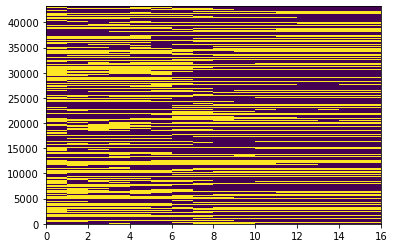

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [22]:
import pandas as pd
if model_checkpoint == 'distilbert-base-uncased-finetuned-sst-2-english':
    model_checkpoint = 'distilbert-base'
dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Plutchik] 2Select/TI-{model_checkpoint}-{fileTag}.csv')

In [23]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Plutchik] 2Select/ESI-{model_checkpoint}-{fileTag}.csv')